In [1]:
# 2 UnSupervised models
#    1 - Kmeans
#    2 - Gaussian Mixture
#
# loading libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [3]:
# load dataset
#     Training data has one of the following labels:
#     0 T-shirt/top  1 Trouser  2 Pullover  3 Dress   4 Coat
#     5 Sandal       6 Shirt   7 Sneaker   8 Bag     9 Ankle boot 

#   Training data
df_training = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttrain.csv')

# Select subset of items
train_subset = df_training.loc[df_training['label'].isin([1,3,7])]

#   split data table into data Features (x) and class labels (y)
xdf_train = train_subset.iloc[:, 1:]
ydf_train = train_subset.iloc[:, :1]


In [4]:
# Select subset 3 items
# 1 Trouser,   3 Dress,  7 Sneaker

train_subset = df_training.loc[df_training['label'].isin([1,3,7])]


In [5]:
#   split data table into data Features (x) and class labels (y)
xdf_train = train_subset.iloc[:, 1:]
ydf_train = train_subset.iloc[:, :1]

In [6]:
#   Test data
#   split data table into data Features (x) and class labels (y)
df_test = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttest.csv')

# Select subset 3 items
# 1 Trouser,   3 Dress,  7 Sneakers

test_subset = df_test.loc[df_test['label'].isin([1,3,7])]

#   split data table into data Features (x) and class labels (y)
xdf_test = test_subset.iloc[:, 1:]
ydf_test = test_subset.iloc[:, :1]


In [7]:
#   Convert to numpy array
x_train = xdf_train.as_matrix()
y_train = ydf_train.as_matrix()
x_test = xdf_test.as_matrix()
y_test = ydf_test.as_matrix()

# Reshape array
y2_train = np.ravel( y_train[ : , 0] ) 
y2_test = np.ravel( y_test[ : , 0] ) 


In [8]:
x_train.shape


(18000, 784)

In [9]:
x_test.shape

(3000, 784)

In [10]:
# plot sample of images
frst_img = np.where(y2_test==1)[0][0]
secnd_img = np.where(y2_test==3)[0][0]
thrd_img = np.where(y2_test==7)[0][0]

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_test[[frst_img, secnd_img, thrd_img]],
                                          y2_test[[frst_img, secnd_img, thrd_img]])):
 plt.subplot(1, 3, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Image: %i\n' % label, fontsize = 20)


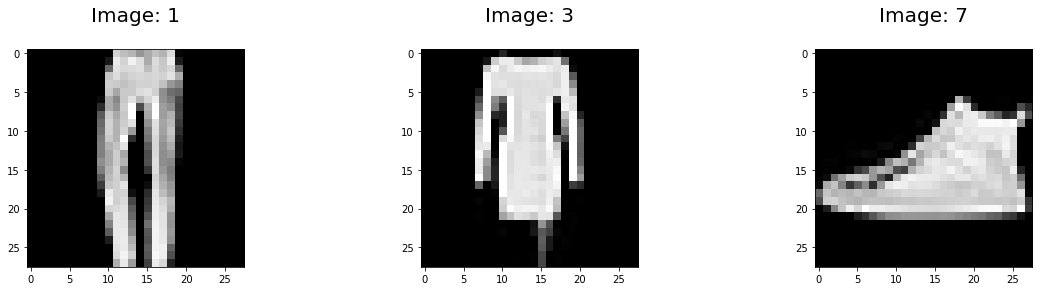

In [11]:
plt.show()


In [12]:
# KMeans
# 1 - Import the model 
from sklearn import cluster


In [13]:
# 2 - Make an instance of the Model with 3 clusters
k_means = cluster.KMeans(n_clusters=3)


In [14]:
# 3 - fitting the model - Training data
time_strt = datetime.now()
k_means.fit(x_train) 
time_fin = datetime.now()
print ("Fitting model with Trainng data: running time", (time_fin - time_strt))
y_train = k_means.labels_


Fitting model with Trainng data: running time 0:00:17.842985


In [15]:
# 4 - Predict - Test data
time_strt = datetime.now()
k_means_predict_train = k_means.predict(x_train)
time_fin = datetime.now()
print ("Predict with Training data: running time", (time_fin - time_strt))


Predict with Training data: running time 0:00:00.512230


In [16]:
# 5 - Evaluate accuracy
import collections

In [17]:
print(k_means.labels_[:100])


[0 0 0 2 1 1 2 2 1 2 0 1 1 2 2 0 2 2 0 0 2 1 2 1 2 2 2 2 1 2 1 2 0 0 2 1 1
 2 1 2 2 2 2 0 0 1 1 2 2 1 1 1 0 2 1 0 2 1 1 1 1 0 1 2 1 2 1 2 2 2 2 1 2 2
 1 1 1 0 0 2 0 2 2 2 1 1 0 2 2 0 2 1 2 0 0 2 1 2 0 1]


In [18]:
print(y2_train[:100])

[3 3 3 3 7 7 1 3 7 3 1 7 7 1 3 3 1 1 3 3 1 7 1 7 3 3 3 1 7 1 7 3 3 3 3 7 7
 3 7 1 3 1 3 3 3 7 7 1 1 7 7 7 3 1 7 3 1 7 7 7 7 3 7 3 7 1 7 3 3 1 3 7 1 1
 7 7 7 3 3 1 3 1 1 3 7 7 1 1 1 3 1 7 3 3 3 1 7 3 3 7]


In [19]:
collections.Counter(k_means_predict_train)

Counter({0: 4150, 1: 6032, 2: 7818})

In [20]:
# True Labels 
collections.Counter(y2_train)

Counter({1: 6000, 3: 6000, 7: 6000})

In [21]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabaz_score(x_train, k_means.labels_)


7709.0038582470888

In [22]:
# 3 - fitting the model - Test data
time_strt = datetime.now()
k_means.fit(x_test) 
time_fin = datetime.now()
print ("Fitting model with Test data: running time", (time_fin - time_strt))
y_test= k_means.labels_

Fitting model with Test data: running time 0:00:03.047750


In [23]:
# 4 - Predict - Test data
time_strt = datetime.now()
k_means_predict_test = k_means.predict(x_test)
time_fin = datetime.now()
print ("Predict with Test data: running time", (time_fin - time_strt))


Predict with Test data: running time 0:00:00.093679


In [24]:
# 5 - Evaluate accuracy
print(k_means.labels_[:100])

[2 0 0 0 2 1 2 1 1 2 2 0 2 2 2 2 1 2 1 0 2 2 2 0 1 1 0 0 0 1 0 1 1 2 1 0 2
 1 0 2 2 2 0 0 0 2 2 0 2 1 1 2 1 1 2 2 2 1 2 2 1 2 1 1 2 1 2 1 2 1 1 2 2 2
 2 2 0 1 0 2 2 2 2 0 2 1 1 1 1 1 2 1 1 1 1 2 1 2 2 0]


In [25]:
# True Labels
print(y2_test[:100])

[1 3 3 3 1 7 1 7 7 1 3 3 3 3 1 1 7 3 7 1 1 1 1 3 7 7 3 3 3 7 3 7 7 1 7 3 1
 7 3 3 3 1 3 3 3 1 3 3 3 7 7 3 7 7 1 3 1 7 1 1 7 1 7 7 3 7 1 7 1 7 7 3 3 1
 3 3 3 7 3 1 1 1 3 3 1 7 7 7 7 7 1 7 7 7 7 1 7 1 3 3]


In [26]:
collections.Counter(k_means_predict_test)

Counter({0: 655, 1: 1009, 2: 1336})

In [28]:
# True Labels
collections.Counter(y2_test)

Counter({1: 1000, 3: 1000, 7: 1000})

In [29]:
metrics.calinski_harabaz_score(x_test, k_means.labels_)

1288.951764249304

In [30]:
# Gaussian Mixture
# 1 - Import the model 
from sklearn.mixture import GaussianMixture


In [31]:
# 2 - Make an instance of the Model with 3 components
GMM_model= GaussianMixture(n_components=3, covariance_type='full')


In [32]:
# 3 - fitting the model - Training data
time_strt = datetime.now()
GMM_model.fit(x_train)
time_fin = datetime.now()
print ("Fitting model with Training data: running time", (time_fin - time_strt))


Fitting model with Training data: running time 0:02:26.145255


In [33]:
# 4 Predict the Model
time_strt = datetime.now()
GMM_predict_train = GMM_model.predict(x_train)
time_fin = datetime.now()
print ("Prediciting model with Training data: running time", (time_fin - time_strt))

Prediciting model with Training data: running time 0:00:05.087695


In [34]:
# 5 - Evaluate accuracy
print(GMM_predict_train[:100])

[0 0 0 0 2 2 0 0 1 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 1 0 0 0 0 2 2
 0 2 0 0 0 0 0 0 2 2 0 0 1 2 2 0 0 1 0 0 2 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 0
 1 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 1]


In [35]:
# True Labels
print(y2_train[:100])

[3 3 3 3 7 7 1 3 7 3 1 7 7 1 3 3 1 1 3 3 1 7 1 7 3 3 3 1 7 1 7 3 3 3 3 7 7
 3 7 1 3 1 3 3 3 7 7 1 1 7 7 7 3 1 7 3 1 7 7 7 7 3 7 3 7 1 7 3 3 1 3 7 1 1
 7 7 7 3 3 1 3 1 1 3 7 7 1 1 1 3 1 7 3 3 3 1 7 3 3 7]


In [36]:
collections.Counter(GMM_predict_train)

Counter({0: 11955, 1: 1664, 2: 4381})

In [37]:
# True Labels
collections.Counter(y2_train)

Counter({1: 6000, 3: 6000, 7: 6000})

In [38]:
# 3 - fitting the model - Test data
time_strt = datetime.now()
GMM_model.fit(x_test)
time_fin = datetime.now()
print ("Fitting model with Test data: running time", (time_fin - time_strt))

Fitting model with Test data: running time 0:00:15.475417


In [39]:
# 4 Predict the Model
time_strt = datetime.now()
GMM_predict_test = GMM_model.predict(x_test)
time_fin = datetime.now()
print ("Prediciting model with Test data: running time", (time_fin - time_strt))

Prediciting model with Test data: running time 0:00:00.858419


In [41]:
# 5 - Evaluate accuracy
print(GMM_predict_test[:100])

[1 0 0 0 1 2 1 2 2 1 1 0 1 1 1 1 2 1 2 1 1 1 1 0 2 2 0 0 1 2 0 2 2 1 2 0 1
 2 0 1 1 1 0 0 1 1 1 0 1 2 2 1 2 2 1 1 1 2 1 1 2 1 2 2 1 2 1 2 1 2 2 1 1 1
 1 1 1 2 0 1 1 1 1 0 1 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1]


In [42]:
# True Labels
print(y2_test[:100])

[1 3 3 3 1 7 1 7 7 1 3 3 3 3 1 1 7 3 7 1 1 1 1 3 7 7 3 3 3 7 3 7 7 1 7 3 1
 7 3 3 3 1 3 3 3 1 3 3 3 7 7 3 7 7 1 3 1 7 1 1 7 1 7 7 3 7 1 7 1 7 7 3 3 1
 3 3 3 7 3 1 1 1 3 3 1 7 7 7 7 7 1 7 7 7 7 1 7 1 3 3]


In [43]:
collections.Counter(GMM_predict_test)

Counter({0: 549, 1: 1442, 2: 1009})

In [44]:
# True Labels
collections.Counter(y2_test)

Counter({1: 1000, 3: 1000, 7: 1000})

In [47]:
metrics.calinski_harabaz_score(x_test, GMM_predict_test)

1257.8053696562531